In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("Plots")

# The package Interact only starts properly when the notebook() is started via the IJulia in the Julia REPL!!
Pkg.add("Interact")

Pkg.update()

using Plots
using Interact

  Activating project at `~/Documents/GitHub/Phys215-202223-1/00-Intro`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/GitHub/Phys215-202223-1/00-Intro/Project.toml`
  No Changes to `~/Documents/GitHub/Phys215-202223-1/00-Intro/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Documents/GitHub/Phys215-202223-1/00-Intro/Project.toml`
  No Changes to `~/Documents/GitHub/Phys215-202223-1/00-Intro/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
   Installed FilePathsBase ─ v0.9.20
  No Changes to `~/Documents/GitHub/Phys215-202223-1/00-Intro/Project.toml`
    Updating `~/Documents/GitHub/Phys215-202223-1/00-Intro/Manifest.toml`
  [48062228] ↑ FilePathsBase v0.9.19 ⇒ v0.9.20
  [6038ab10] ↑ Rotations v1.3.1 ⇒ v1.3.2
Precompiling project...
  ✓ FilePathsBase
  ✓ CSV
  2 dependencies successfully precompiled in

WebIO._IJuliaInit()

# Exploring Julia with Mandelbrot set

The Mandelbrot set is the set of complex numbers $c=x+iy$ such that the successive application of the following operations from $z = 0$ do not proceed to infinity.
$$z \leftarrow z + c$$
The way to implement this is to ensure that the $|z| < 2$ after some finite iterations.

In [9]:
function mandel( c )
    z = c
    itrMax = 80
    for n in 1:itrMax
        if abs(z) > 2
            return n-1
        end
        z = z^2 + c
    end
    return itrMax
end

mandel (generic function with 1 method)

In [10]:
"""
Plots the results of `mandel()` function
"""
function plotMandel( xrange::Tuple{Float64,Float64}, yrange::Tuple{Float64,Float64}; n=100 )
    M = rand(n,n);
    xval = range(xrange[1],xrange[2]; length=n );
    yval = range(yrange[1],yrange[2]; length=n );
    for i in 1:n, j in 1:n
        M[i,j] = mandel( xval[i] + im*yval[j]  )
    end
    
    heatmap( M, c=:thermal
        ,aspect_ratio=1.0
#        ,xaxis=nothing
#        ,yaxis=nothing
        ,key=:none
    )
end

plotMandel

In [11]:
plotMandel( vrange::Tuple{Float64,Float64}; n=100 ) = plotMandel( vrange, vrange; n )

plotMandel (generic function with 2 methods)

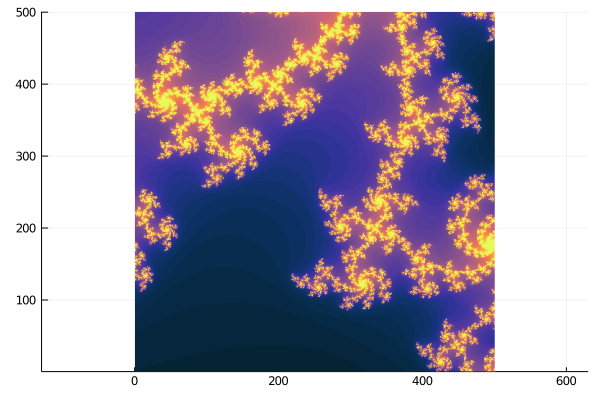

In [12]:
plotMandel( (0.373, 0.374), n=500 )

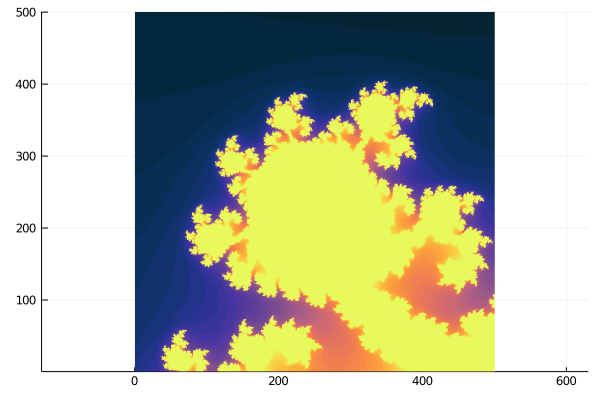

In [13]:
plotMandel( (0.352, 0.353), n=500 )

In [16]:
@manipulate for min in 0.3:0.001:0.5, max in 0.3:0.001:0.4 #min in -2.0:0.001:2.0, max in -2.0:0.001:2.0
    plotMandel( (min,max), n=200 )
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["min"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/johnrob/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/johnrob/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/johnrob/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/johnrob/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/johnrob/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001161fcbe0, Task (runnable) @0x00000001161fcbe0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.3\",\"0.301\",\"0.302\",\"0.303\",\"0.304\",\"0.305\",\"0.306\",\"0.307\",\"0.308\",\"0.309\",\"0.31\",\"0.311\",\"0.312\",\"0.313\",\"0.314\",\"0.315\",\"0.316\",\"0.317\",\"0.318\",\"0.319\",\"0.32\",\"0.321\",\"0.322\",\"0.323\",\"0.324\",\"0.325\",\"0.326\

In [3]:
@manipulate for param in 1:100
    scatter( rand(param), rand(param)
        ,xlim=(0,1)
        ,ylim=(0,1)
    )
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["param"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/johnrob/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/johnrob/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/johnrob/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/johnrob/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/johnrob/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001244f4160, Task (runnable) @0x00000001244f4160), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"3